In [104]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
import import_ipynb
from regression_tree import  RegressionTree

In [159]:
class GradientBoostingRegressor:
    
    def __init__(self, numTrees=20, maxDepth=3, minSamples=2, learningRate = 0.5):
        self.numTrees = numTrees
        self.maxDepth = maxDepth
        self.minSamples = minSamples
        self.trees = []
        self.learningRate = learningRate 
    
    def fit(self, X, y):
        
        #first prediction is avg of y
        currPrediction = np.mean(y)

        for i in range(self.numTrees):
            #calculate pseudoresiduals/errors (true value - prediction)
            pseudoResiduals = y-currPrediction
            #build regression tree to predict residuals
            rTree = RegressionTree(maxDepth = self.maxDepth, minSamples = self.minSamples)
            rTree.fit(X, pseudoResiduals)
            self.trees.append(rTree)
            #update prediction (sum of all trees' predictions) up to the current iteration. scale new tree prediction by a user-defined learning rate
            currPrediction = currPrediction + self.learningRate * np.array(rTree.predict(X))
            
        
    def predict(self, X):
        #at prediction time, sum predictions from all trees for each observation
        predictions = np.swapaxes([tree.predict(X) for tree in self.trees], 0, 1)
        return [sum(p) for p in predictions]


In [160]:
X, y = datasets.make_regression(n_samples=500, noise=10, random_state=123, n_features=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [161]:
model = GradientBoostingRegressor()
model.fit(X_train,  Y_train)
predictions = model.predict(X_test)

In [162]:
mean_squared_error(Y_test, predictions, squared=False)

91.4559223785439

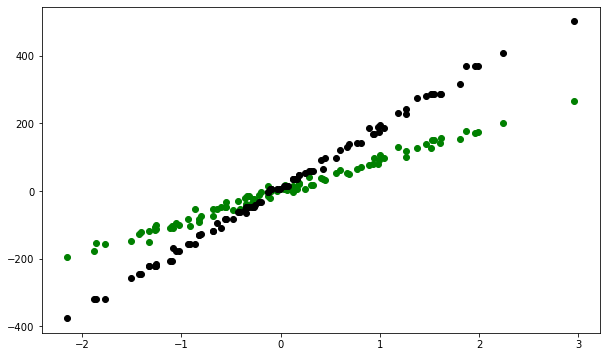

In [163]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X_test, Y_test, color='green')
plt.scatter(X_test, predictions, color='black', linewidth=1)